# Imports

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPool2D, Resizing, BatchNormalization
from tensorflow.nn import sigmoid, relu, softmax, softmax_cross_entropy_with_logits
from tensorflow.keras.utils import normalize
from tensorflow.keras.callbacks import TensorBoard

from keras.utils import np_utils
%load_ext tensorboard

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
import pickle
import json
from datetime import datetime


# Read & view details about dataframe

In [5]:
df_train = pd.read_csv('train.csv')


## Create data

In [6]:
X = df_train.drop('label', axis=1)
y = df_train['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43)

## Normalize data

In [7]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Data analysis

[Text(0.5, 0, 'Digit 0 - 9')]

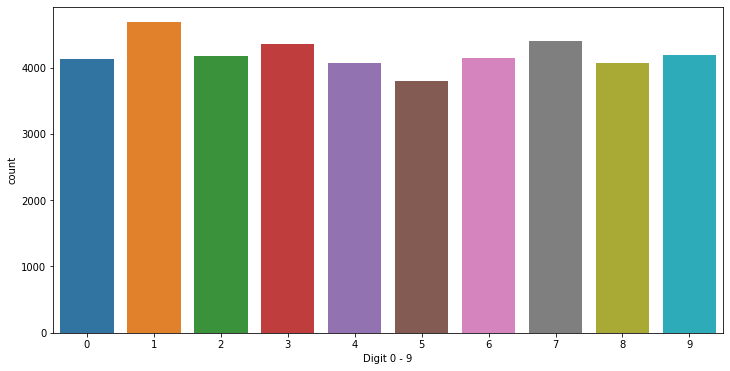

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df_train, x='label', ax=ax)
ax.set(xlabel="Digit 0 - 9")

Check if number of true values are relevant in determining a better score

In [9]:
df_train['true_values'] = df_train.drop('label', axis=1).sum(axis=1)
df_train['true_values'].mean()

26192.586357142856

[Text(0.5, 0, 'Digit 0 - 9')]

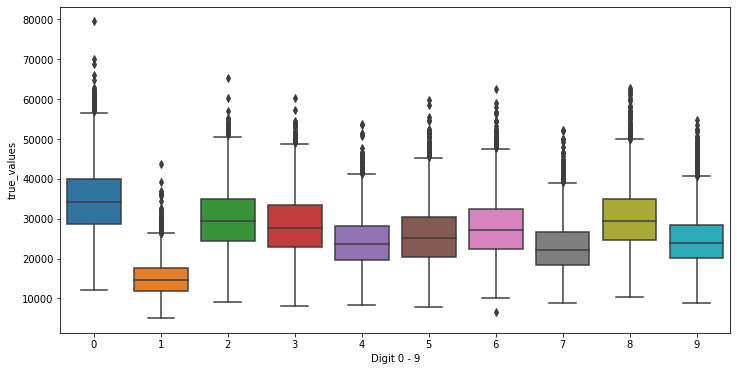

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df_train, x='label', y='true_values', ax=ax)
ax.set(xlabel="Digit 0 - 9")

[Text(0.5, 0, 'Digit 0 - 9')]

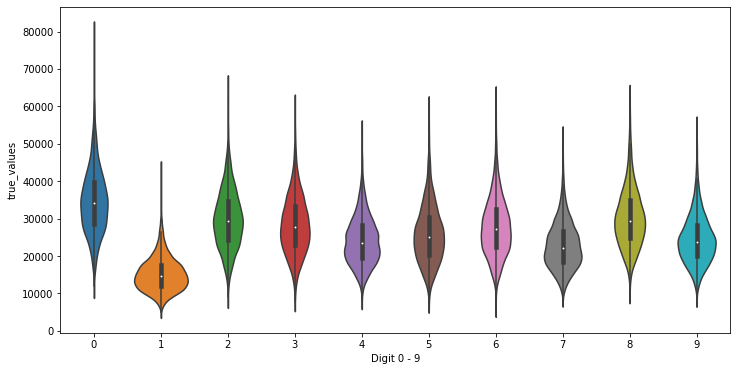

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=df_train, x='label', y='true_values', ax=ax)
ax.set(xlabel="Digit 0 - 9")

In [12]:
df_train.drop('true_values', axis=1, inplace=True)

In [13]:
arr_digits = []
for _ in range(len(df_train)):
    arr_digits.append(
        {
            "label": df_train.iloc[_]['label'],
            "pixels": np.array(df_train.iloc[_][1:]).reshape((28, 28))
        })

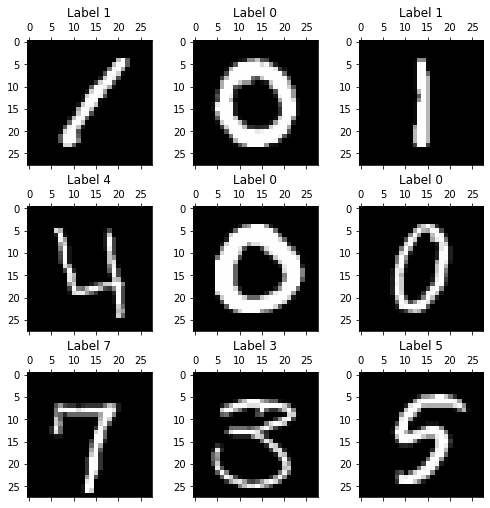

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(7, 7))
x = y = np.linspace(0, 28, 1)
_ = 0
for i in range(3):
    for j in range(3):
        label = arr_digits[_]['label']
        pixels = arr_digits[_]['pixels']

        axes[i, j].matshow(pixels, cmap='gray')
        axes[i, j].set_title("Label {}".format(label))
        _ += 1
fig.tight_layout(pad=.5)
plt.show()

# Fit & Print & Save models

In [17]:
best_scores = {}


def print_info(name, best_params, y_true, y_pred):
    print("\n\n*** {} ***\n\n".format(name))
    print("Classification report:\n", classification_report(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

    acc_score = accuracy_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print("Accuracy score: " + str(acc_score),
          "Mean absolute error: " + str(mae),
          "Mean squared error: " + str(mse), sep='\n')

    if name in best_scores:
        print("This name is used, cannot save this.")
        return

    best_scores[name] = {
        "accuracy_score": acc_score,
        "mean_absolute_error": mae,
        "mean_squared_error": mse,
        "params": best_params
    }


def save_model(model):
    pickle.dump(dtc_model, open(name+'.sav', 'wb'))


def alg(name, model):
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_info(name, model.get_params(), y_test, y_pred)
    save_model(model)

# Select algorithms

* SVC
* DecisionTreeClassifier
* RandomForestClassifier

In [ ]:
svc_model = SVC()
dtc_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()

## Run algorithms

In [ ]:
alg('DecisionTreeClassifier', dtc_model)
alg("RandomForestClassifier", rfc_model)
alg("SVC", svc_model)

## Load models

In [18]:
svc_model = pickle.load(open('SVC.sav', 'rb'))
dtc_model = pickle.load(open('DecisionTreeClassifier.sav', 'rb'))
rfc_model = pickle.load(open('RandomForestClassifier.sav', 'rb'))

## Fit data

In [19]:
y_pred_svc = svc_model.predict(X_test)
y_pred_dtc = dtc_model.predict(X_test)
y_pred_rfc = rfc_model.predict(X_test)

In [20]:
tree_max_depth = dtc_model.tree_.max_depth

## Print info

In [21]:
print_info("SVC", svc_model.get_params(), y_test, y_pred_svc)
print_info("DTC", dtc_model.get_params(), y_test, y_pred_dtc)
print_info("RFC", rfc_model.get_params(), y_test, y_pred_rfc)



*** SVC ***


Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1270
           1       0.94      0.94      0.94      1382
           2       0.84      0.84      0.84      1258
           3       0.80      0.81      0.81      1259
           4       0.82      0.85      0.84      1227
           5       0.83      0.81      0.82      1198
           6       0.89      0.88      0.88      1237
           7       0.86      0.89      0.88      1254
           8       0.80      0.79      0.79      1237
           9       0.83      0.81      0.82      1278

    accuracy                           0.85     12600
   macro avg       0.85      0.85      0.85     12600
weighted avg       0.85      0.85      0.85     12600

Confusion matrix:
 [[1159    2   11   18    9   15   18   13   13   12]
 [   1 1298   15   12    7    9    4   17   18    1]
 [  17   16 1056   37   27   15   17   27   28   18]
 [   9   11   41 1020  

# DecisionTreeClassifier hyperparameters

## Create & Fit & Save model 

In [ ]:
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(tree_max_depth-5, tree_max_depth+5),
    'min_samples_split':  range(2, 10),
    'min_samples_leaf': range(1, 5)
}

grid_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv=3, verbose=3,
                        n_jobs=-1)
grid_dtc.fit(X_train, y_train)
pickle.dump(grid_dtc, open("GridSearchCV-dtc.sav", 'wb'))

## Load model

In [22]:
best_dtc = pickle.load(open('GridSearchCV-dtc.sav', 'rb'))

## Fit data

In [23]:
y_pred_best_dtc = best_dtc.predict(X_test)

## Print info

In [24]:
print_info("Best_DTC", best_dtc.best_params_, y_test, y_pred_best_dtc)



*** Best_DTC ***


Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92      1270
           1       0.94      0.94      0.94      1382
           2       0.83      0.84      0.83      1258
           3       0.80      0.84      0.82      1259
           4       0.85      0.85      0.85      1227
           5       0.81      0.78      0.79      1198
           6       0.86      0.88      0.87      1237
           7       0.87      0.89      0.88      1254
           8       0.82      0.78      0.80      1237
           9       0.82      0.80      0.81      1278

    accuracy                           0.85     12600
   macro avg       0.85      0.85      0.85     12600
weighted avg       0.85      0.85      0.85     12600

Confusion matrix:
 [[1158    1   20   11    6   35   18    5   10    6]
 [   1 1305   15    9    2   11    8   19    8    4]
 [  11   16 1054   42   15   14   29   35   28   14]
 [   5    5   33 1

# RandomForestClassifier hyperparameters

## Create & Fit & Save model 

In [ ]:
param_grid_dtc = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 8, 15, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid_dtc, cv=3, verbose=3,
                        n_jobs=-1)
grid_rfc.fit(X_train, y_train)
pickle.dump(grid_rfc, open("GridSearchCV-rfc.sav", 'wb'))

## Load model

In [25]:
best_rfc = pickle.load(open('GridSearchCV-rfc.sav', 'rb'))

## Fit data

In [26]:
y_pred_best_rfc = best_rfc.predict(X_test)

## Print info

In [27]:
print_info("best_RFC", best_rfc.best_params_, y_test, y_pred_best_rfc)



*** best_RFC ***


Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1270
           1       0.98      0.98      0.98      1382
           2       0.96      0.96      0.96      1258
           3       0.95      0.95      0.95      1259
           4       0.97      0.97      0.97      1227
           5       0.97      0.96      0.96      1198
           6       0.97      0.98      0.98      1237
           7       0.97      0.97      0.97      1254
           8       0.96      0.95      0.95      1237
           9       0.94      0.94      0.94      1278

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

Confusion matrix:
 [[1250    0    1    1    0    2    8    1    7    0]
 [   0 1358   12    5    2    1    1    1    2    0]
 [   4    1 1213    9    8    1    5    5   10    2]
 [   2    0   13 1

# SVC hyperparameters

## Create & Fit & Save model 

In [ ]:
param_grid_svc = {'C': [0.1, 1, 10, 100],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'kernel': ['poly']}
grid_svc = GridSearchCV(SVC(), param_grid_svc, cv=3, verbose=3,
                        n_jobs=-1)
grid_svc.fit(X_train, y_train)
pickle.dump(grid_svc, open("GridSearchCV-svc.sav", 'wb'))

## Load model

In [28]:
best_svc = pickle.load(open('GridSearchCV-svc.sav', 'rb'))

## Fit data

In [29]:
y_pred_best_svc = best_svc.predict(X_test)

## Print info

print_info("best_SVC", best_svc.best_params_, y_test, y_pred_best_svc)

# Tensorflow

In [8]:
def model_fit(model_name, model):
    return model.fit(X_train, y_train,
                     batch_size=128,
                     epochs=50,
                     verbose=1,
                     shuffle=True,
                     validation_data=(X_test, y_test),
                     callbacks=[
                         TensorBoard(log_dir="logs/scalars/"+model_name),
                         tf.keras.callbacks.ModelCheckpoint(
                             './models/' + model_name + '{epoch:08d}.h5', period=5)
                     ])

## Model = Simple nn &#8594; Flatten &#8594; 128 &#8594; 128 &#8594; 10

In [9]:
def simple_model():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(128, activation=relu))
    model.add(Dense(128, activation=relu))
    model.add(Dense(10, activation=softmax))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                  )
    return model

## Model = <br/> &emsp;&emsp;&emsp;&emsp;Conv2D &#8594; MaxPool2D &#8594;  <br/> &emsp;&emsp;&emsp;&emsp;Conv2D &#8594; MaxPool2D &#8594; <br/> &emsp;&emsp;&emsp;&emsp;Flatten &#8594; Dense (256) &#8594; Dropout (0.5) &#8594; Dense(10)

In [10]:
def LeNet():
    model = Sequential()

    model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='same',
                     activation=sigmoid, input_shape=(28, 28, 1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(5, 5), activation=sigmoid))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(120, activation=sigmoid))
    model.add(Dense(84, activation=relu))
    model.add(Dense(10, activation=softmax))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

## Model = <br/> &emsp;&emsp;&emsp;&emsp;Conv2D &#8594; BatchNormalization &#8594; MaxPool2D &#8594;  <br/> &emsp;&emsp;&emsp;&emsp;Conv2D &#8594; BatchNormalization &#8594; MaxPool2D &#8594; <br/> &emsp;&emsp;&emsp;&emsp;Conv2D &#8594; Conv2D &#8594; Conv2D &#8594; <br/> &emsp;&emsp;&emsp;&emsp;BatchNormalization &#8594; MaxPool2D &#8594;<br/> &emsp;&emsp;&emsp;&emsp;Flatten &#8594;Dense (4096) &#8594; Dense (4096) &#8594; Dense(10)

In [10]:
def AlexNet():
    model = Sequential()
    model.add(Conv2D(96, (11, 11), input_shape=(28, 28, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(3, strides=2))
    model.add(Conv2D(256, 5, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(3, strides=2))
    model.add(Conv2D(384, 3, strides=1, padding='same', activation='relu'))
    model.add(Conv2D(384, 3, strides=1, padding='same', activation='relu'))
    model.add(Conv2D(256, 3, strides=1, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(3, strides=2))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
model_fit('simple_model', simple_model())

Epoch 1/50
263/263 [==============================] - 2s 4ms/step - loss: 0.6706 - accuracy: 0.8223 - val_loss: 0.3182 - val_accuracy: 0.9032
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 0.2644 - accuracy: 0.9220 - val_loss: 0.2319 - val_accuracy: 0.9306
Epoch 3/50
263/263 [==============================] - 1s 4ms/step - loss: 0.2045 - accuracy: 0.9399 - val_loss: 0.1867 - val_accuracy: 0.9437
Epoch 4/50
263/263 [==============================] - 1s 4ms/step - loss: 0.1668 - accuracy: 0.9501 - val_loss: 0.1664 - val_accuracy: 0.9483
Epoch 5/50
263/263 [==============================] - 1s 4ms/step - loss: 0.1420 - accuracy: 0.9574 - val_loss: 0.1455 - val_accuracy: 0.9548
Epoch 6/50
263/263 [==============================] - 1s 4ms/step - loss: 0.1207 - accuracy: 0.9655 - val_loss: 0.1471 - val_accuracy: 0.9552
Epoch 7/50
263/263 [==============================] - 1s 4ms/step - loss: 0.1051 - accuracy: 0.9693 - val_loss: 0.1280 - val_accuracy: 0.9604
Epoch 

## One-hot Encoding:


In [11]:
X_train = np.array([X_train.iloc[_].values.reshape(28, 28)
                   for _ in range(len(X_train))])
X_test = np.array([X_test.iloc[_].values.reshape(28, 28)
                  for _ in range(len(X_test))])

In [13]:
model_fit("LeNet", LeNet())

Epoch 1/50
263/263 [==============================] - 4s 8ms/step - loss: 2.3075 - accuracy: 0.1070 - val_loss: 2.3043 - val_accuracy: 0.0977
Epoch 2/50
263/263 [==============================] - 2s 8ms/step - loss: 1.8211 - accuracy: 0.3689 - val_loss: 0.7099 - val_accuracy: 0.7689
Epoch 3/50
263/263 [==============================] - 2s 8ms/step - loss: 0.4841 - accuracy: 0.8551 - val_loss: 0.3548 - val_accuracy: 0.8883174 
Epoch 4/50
263/263 [==============================] - 2s 8ms/step - loss: 0.3083 - accuracy: 0.9050 - val_loss: 0.2540 - val_accuracy: 0.9244
Epoch 5/50
263/263 [==============================] - 2s 8ms/step - loss: 0.2409 - accuracy: 0.9254 - val_loss: 0.2193 - val_accuracy: 0.9290
Epoch 6/50
263/263 [==============================] - 2s 8ms/step - loss: 0.2005 - accuracy: 0.9370 - val_loss: 0.1918 - val_accuracy: 0.9407
Epoch 7/50
263/263 [==============================] - 2s 8ms/step - loss: 0.1693 - accuracy: 0.9470 - val_loss: 0.1828 - val_accuracy: 0.9425
Ep

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
model_fit("AlexNet", AlexNet())

Epoch 1/50
263/263 [==============================] - 16s 42ms/step - loss: 0.5396 - accuracy: 0.8561 - val_loss: 1.9871 - val_accuracy: 0.5215oss: 2.6272 - accura - ETA: 7s - loss: 2.2349 - accura - ETA: 7s - loss: 1.9130 - accuracy - ETA: 6s - loss: 1.7274 - accuracy: 0. - ETA - ETA - ETA: 4s - loss: 0.8840 - accuracy: 0. - ETA:  - ETA: 2s - loss: 0.7240 - accuracy - ETA: 2s - loss: 0.6986  - ETA: 1s - loss: 0.6504 - accuracy: 0. - ETA: 1s - loss: 0.6405 - accura
Epoch 2/50
263/263 [==============================] - 11s 42ms/step - loss: 0.0840 - accuracy: 0.9753 - val_loss: 1.0637 - val_accuracy: 0.7790
Epoch 3/50
263/263 [==============================] - 11s 42ms/step - loss: 0.0597 - accuracy: 0.9826 - val_loss: 0.0858 - val_accuracy: 0.9764
Epoch 4/50
263/263 [==============================] - 11s 42ms/step - loss: 0.0516 - accuracy: 0.9850 - val_loss: 0.0773 - val_accuracy: 0.9814
Epoch 5/50
263/263 [==============================] - 12s 45ms/step - loss: 0.0430 - accuracy: 0.9

In [5]:
%tensorboard --logdir logs

# Load AlexNet for 50 more epochs

In [47]:
load_model_AlexNet = tf.keras.models.load_model('./models/AlexNet00000050.h5')

In [48]:
load_model_AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 96)        11712     
                                                                 
 batch_normalization (BatchN  (None, 18, 18, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 256)         614656    
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 256)        1024      
 hNormalization)                                                 
                                                        

In [50]:
model_fit("load_model_AlexNet", load_model_AlexNet)

Epoch 1/50
263/263 [==============================] - 11s 39ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0848 - val_accuracy: 0.9882
Epoch 2/50
263/263 [==============================] - 10s 37ms/step - loss: 0.0373 - accuracy: 0.9972 - val_loss: 0.1275 - val_accuracy: 0.9807: 0s - loss: 0.0380 - ac
Epoch 3/50
263/263 [==============================] - 11s 43ms/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.0515 - val_accuracy: 0.9895
Epoch 4/50
263/263 [==============================] - 11s 43ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0648 - val_accuracy: 0.9888
Epoch 5/50
263/263 [==============================] - 12s 45ms/step - loss: 7.4679e-04 - accuracy: 0.9998 - val_loss: 0.0559 - val_accuracy: 0.9924
Epoch 6/50
263/263 [==============================] - 11s 43ms/step - loss: 2.6059e-04 - accuracy: 0.9999 - val_loss: 0.0685 - val_accuracy: 0.9915
Epoch 7/50
263/263 [==============================] - 10s 38ms/step - loss: 0.0037 - accuracy: 0.9992 - 

# Best scores

In [31]:
print(json.dumps(best_scores, indent=4))

{
    "SVC": {
        "accuracy_score": 0.8536507936507937,
        "mean_absolute_error": 0.5103968253968254,
        "mean_squared_error": 2.373253968253968,
        "params": {
            "ccp_alpha": 0.0,
            "class_weight": null,
            "criterion": "gini",
            "max_depth": null,
            "max_features": null,
            "max_leaf_nodes": null,
            "min_impurity_decrease": 0.0,
            "min_samples_leaf": 1,
            "min_samples_split": 2,
            "min_weight_fraction_leaf": 0.0,
            "random_state": null,
            "splitter": "best"
        }
    },
    "DTC": {
        "accuracy_score": 0.8536507936507937,
        "mean_absolute_error": 0.5103968253968254,
        "mean_squared_error": 2.373253968253968,
        "params": {
            "ccp_alpha": 0.0,
            "class_weight": null,
            "criterion": "gini",
            "max_depth": null,
            "max_features": null,
            "max_leaf_nodes": null,
    